In [1]:
from dataset_loader import FashionMNIST, CIFAR10

f_dataset = FashionMNIST(batch_size=32)

train_ds = f_dataset.get_dataloader(train=True)
test_ds = f_dataset.get_dataloader(train=False)

for imgs, labels in train_ds.take(1):
    print("image batch shape: ", imgs.shape)
    print("X type: ", imgs.dtype)
    print("Label batch: ", labels.numpy())
    print("labels: ", f_dataset.text_labels(labels))


image batch shape:  (32, 28, 28, 1)
X type:  <dtype: 'float32'>
Label batch:  [7 3 0 6 6 4 1 3 7 9 5 6 4 2 1 3 4 8 1 3 1 2 9 2 7 3 5 5 7 6 1 6]
labels:  ['Sneaker', 'Dress', 'top', 'Shirt', 'Shirt', 'Coat', 'Trouser', 'Dress', 'Sneaker', 'Ankle boot', 'Sandal', 'Shirt', 'Coat', 'Pullover', 'Trouser', 'Dress', 'Coat', 'Bag', 'Trouser', 'Dress', 'Trouser', 'Pullover', 'Ankle boot', 'Pullover', 'Sneaker', 'Dress', 'Sandal', 'Sandal', 'Sneaker', 'Shirt', 'Trouser', 'Shirt']


In [2]:
c_dataset = CIFAR10(batch_size=32)

train_ds_10 = c_dataset.get_dataloader(train=True)
test_ds_10 = c_dataset.get_dataloader(train=False)

for imgs2, labels in train_ds_10.take(1):
    print("image batch shape: ", imgs2.shape)
    print("X type: ", imgs2.dtype)
    print("Label batch: ", labels.numpy())
    print("labels: ", c_dataset.text_labels(labels))


image batch shape:  (32, 28, 28, 1)
X type:  <dtype: 'float32'>
Label batch:  [[2]
 [5]
 [5]
 [0]
 [8]
 [4]
 [5]
 [0]
 [8]
 [1]
 [9]
 [8]
 [0]
 [3]
 [5]
 [5]
 [9]
 [8]
 [1]
 [8]
 [5]
 [4]
 [9]
 [6]
 [8]
 [1]
 [1]
 [2]
 [3]
 [0]
 [9]
 [0]]
labels:  ['bird', 'dog', 'dog', 'airplane', 'ship', 'deer', 'dog', 'airplane', 'ship', 'automobile', 'truck', 'ship', 'airplane', 'cat', 'dog', 'dog', 'truck', 'ship', 'automobile', 'ship', 'dog', 'deer', 'truck', 'frog', 'ship', 'automobile', 'automobile', 'bird', 'cat', 'airplane', 'truck', 'airplane']


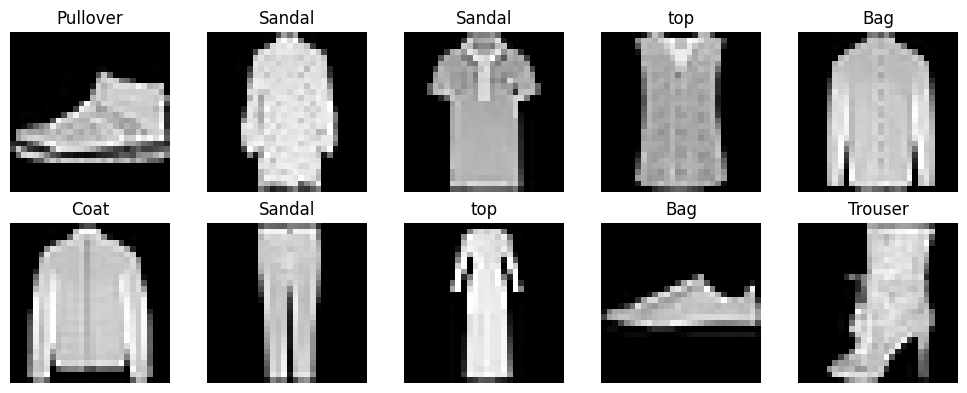

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(imgs[i].numpy().squeeze(), cmap='gray')
    plt.title(f_dataset.text_labels([labels[i]])[0])
    plt.axis('off')
plt.tight_layout()
plt.show()

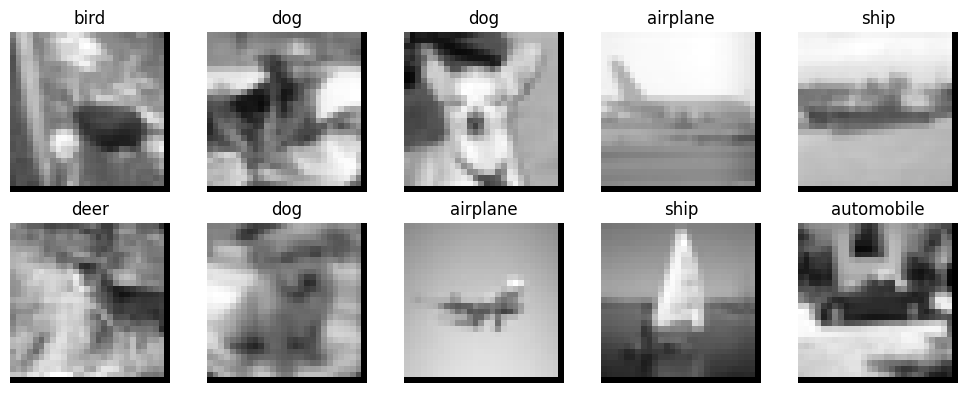

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(imgs2[i].numpy().squeeze(), cmap='gray')
    plt.title(c_dataset.text_labels([labels[i]])[0])
    plt.axis('off')
plt.tight_layout()
plt.show()

In [5]:
# Get input shape dynamically from dataset
for X, y in train_ds.take(1):
    input_shape = X.shape[1:]  # (28, 28, 1) for FashionMNIST
    print("Input shape:", input_shape)


Input shape: (28, 28, 1)


# tf version without early stopping

In [11]:
from model_loader import LogReg

# Setup
num_classes = 10

log_model = LogReg(input_shape=input_shape, num_classes=num_classes)
log_model.tfLogReg()  # initializes the tf_model inside the class

# Train model on FashionMNIST
log_model.tf_model.fit(train_ds, epochs=20)


Epoch 1/20


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 902us/step - accuracy: 0.7372 - loss: 0.8137
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 914us/step - accuracy: 0.8329 - loss: 0.5473
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 916us/step - accuracy: 0.8429 - loss: 0.5275
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 921us/step - accuracy: 0.8447 - loss: 0.5227
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 932us/step - accuracy: 0.8479 - loss: 0.5132
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 992us/step - accuracy: 0.8475 - loss: 0.5126
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8476 - loss: 0.5091
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 962us/step - accuracy: 0.8451 - loss: 0.5143
Epoch 9/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 985us/step - accuracy: 0.8492 - loss: 0.5076
Epoch 10/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 968us/step - accuracy: 0.8463 - loss: 0.5075
Epoch 11/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 975us/step - accuracy: 0.8489 - loss: 0.5104
Epoch 12/20
1875/1875

## with early stopping

In [6]:
import tensorflow as tf

early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',      # watch validation loss
    patience=3,              # stop if val_loss doesn’t improve for 3 epochs
    restore_best_weights=True  # load best weights after stop
)


In [7]:
from model_loader import split_large_dataset, LogReg

num_classes = 10

log_model_es = LogReg(input_shape=input_shape, num_classes=num_classes)
log_model_es.tfLogReg()  # initializes the tf_model inside the class

train_data, val_data = split_large_dataset(train_ds, val_ratio=0.2, batch_size=f_dataset.batch_size, total_size= len(f_dataset.train_ds[0]))

# Train model on FashionMNIST
history = log_model_es.tf_model.fit(
    train_data,
    validation_data=val_data,
    epochs=50,
    callbacks=[early_stop]
)

Epoch 1/50
   1447/Unknown 4s 2ms/step - accuracy: 0.7108 - loss: 0.8800

e:\ml-basics\basics-ml\Lib\site-packages\keras\src\trainers\epoch_iterator.py:151: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7134 - loss: 0.8729 - val_accuracy: 0.8281 - val_loss: 0.5589
Epoch 2/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8292 - loss: 0.5562 - val_accuracy: 0.8412 - val_loss: 0.5308
Epoch 3/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8425 - loss: 0.5335 - val_accuracy: 0.8381 - val_loss: 0.5298
Epoch 4/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.8406 - loss: 0.5275 - val_accuracy: 0.8488 - val_loss: 0.5156
Epoch 5/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8469 - loss: 0.5151 - val_accuracy: 0.8446 - val_loss: 0.5224
Epoch 6/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8442 - loss: 0.5169 - val_accuracy: 0.8509 - val_loss: 0.5094
Epoch 7/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8478 - loss: 0.5159 - val_accuracy: 0.8508 - val_loss: 0.5070
Epoch 8/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8420 - loss: 0.5168 - val_accur

In [8]:
print(history.history.keys())


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


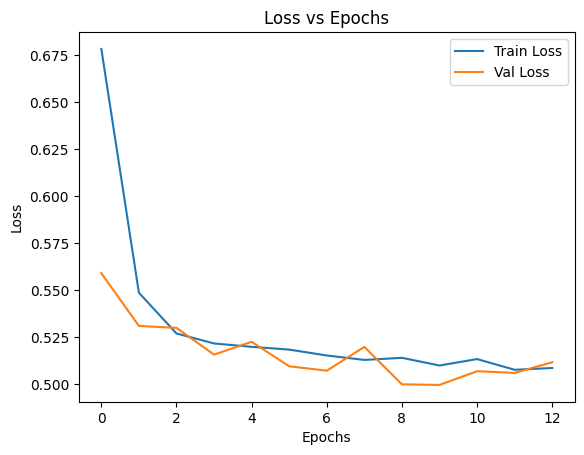

In [12]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.legend()
plt.show()

# sklearn version

In [13]:
import tensorflow as tf
import numpy as np


# Unbatch and flatten images for scikit-learn
X_flat = []
y_flat = []

for X_batch, y_batch in train_ds.unbatch().take(10000):  # take a subset for faster training
    X_flat.append(tf.reshape(X_batch, [-1]))
    y_flat.append(y_batch)


X_flat = np.stack(X_flat)
y_flat = np.array(y_flat)

# Train scikit-learn model
log_model.skLogReg()
log_model.sk_model.fit(X_flat, y_flat)

print("Training complete. Best C:", log_model.sk_model.C_)
print("Train accuracy:", log_model.sk_model.score(X_flat, y_flat))


e:\ml-basics\basics-ml\Lib\site-packages\sklearn\linear_model\_logistic.py:1908: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Training complete. Best C: [0.04641589 0.04641589 0.04641589 0.04641589 0.04641589 0.04641589
 0.04641589 0.04641589 0.04641589 0.04641589]
Train accuracy: 0.8766
